In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary for the pairs of variables to be compared
variable_pairs = {
    's_snow': 'S_snow',
    's_water': 'S_water',
    'prcp(mm/day)': 'prcp',
    'tmean(c)': 'tmean',
    'dayl(s)': 'dayl',
    'et_bucket': 'ET_mech',
    'm_bucket': 'M_mech',
    'ps_bucket': 'Ps_mech',
    'pr_bucket': 'Pr_mech',
    'q_bucket': 'Q_mech'
}

In [11]:
multi_file = '01013500_results_train.csv'
multi_file_lsoda = '01013500_results_train_lsoda.csv'
single_file = '01013500_results_train_single.csv'

df_multi = pd.read_csv(multi_file)
df_multi_lsoda = pd.read_csv(multi_file_lsoda)
df_single = pd.read_csv(single_file)

# Remove HH:MM:SS from the date column
df_single['date'] = df_single['date'].str.split(' ').str[0]

In [12]:
display(
    df_multi.head(),
    df_single.head()
)

,date,s_snow,s_water,et_bucket,m_bucket,ps_bucket,pr_bucket,prcp(mm/day),tmean(c),dayl(s),q_bucket,q_obs
0,1980-10-01,0.0,1303.004248,0.867263,0.0,0.0,3.10,3.10,6.080,11.327991,0.020448,0.550998
1,1980-10-02,0.0,1305.345457,1.153183,0.0,0.0,4.24,4.24,10.530,11.283633,0.021265,0.560741
2,1980-10-03,0.0,1310.056634,1.250724,0.0,0.0,8.02,8.02,11.835,11.231995,0.023011,0.558576
3,1980-10-04,0.0,1320.562348,0.940685,0.0,0.0,15.27,15.27,7.380,11.135989,0.027437,0.671157
4,1980-10-05,0.0,1332.069881,0.800888,0.0,0.0,8.48,8.48,4.800,11.135989,0.033267,0.821626


,date,S_snow,S_water,prcp,tmean,dayl,ET_mech,M_mech,Ps_mech,Pr_mech,Q_mech,q_obs
0,1980-10-01,0.0,1303.004248,3.10,6.080,11.327992,0.867263,1.192093e-07,0.0,3.10,0.020448,0.550998
1,1980-10-02,0.0,1305.345457,4.24,10.530,11.283633,1.153183,1.192093e-07,0.0,4.24,0.021265,0.560741
2,1980-10-03,0.0,1310.056634,8.02,11.835,11.231994,1.250724,1.192093e-07,0.0,8.02,0.023011,0.558576
3,1980-10-04,0.0,1320.562348,15.27,7.380,11.135989,0.940685,1.192093e-07,0.0,15.27,0.027437,0.671157
4,1980-10-05,0.0,1332.069881,8.48,4.800,11.135989,0.800888,1.192093e-07,0.0,8.48,0.033267,0.821626


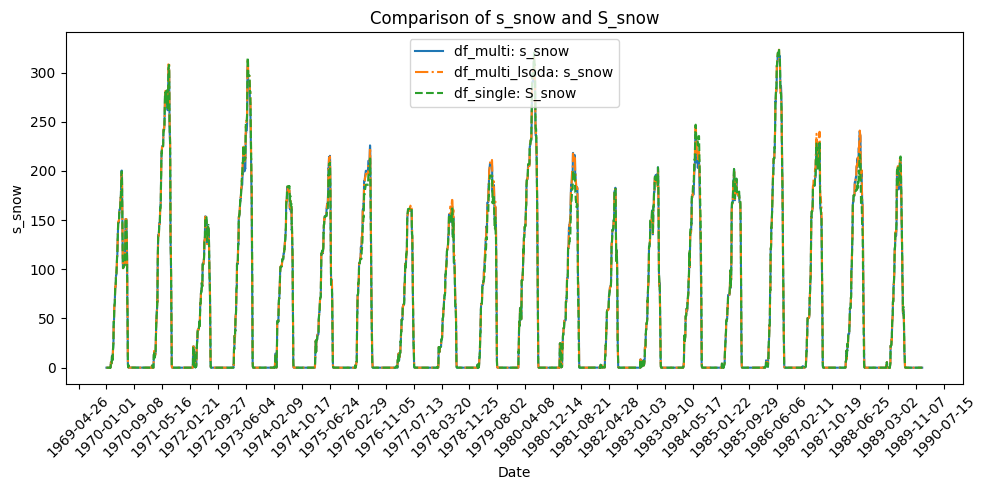

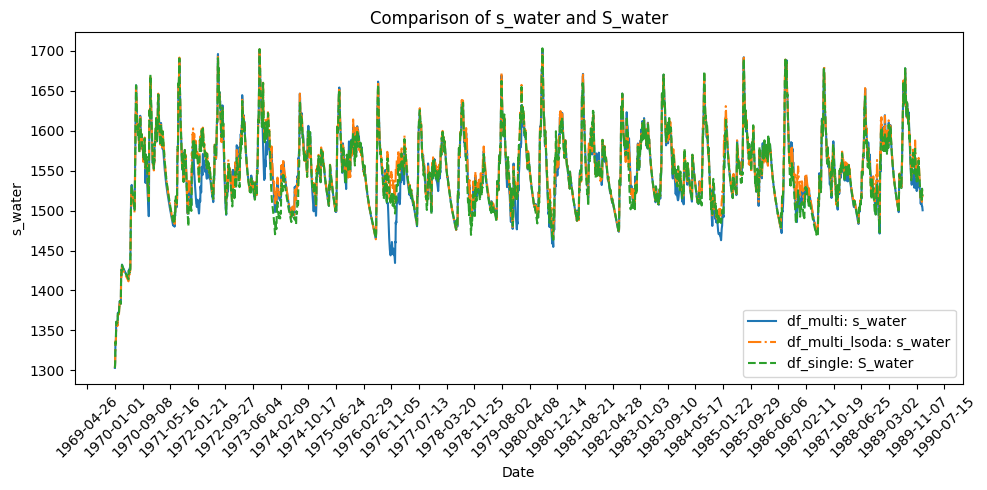

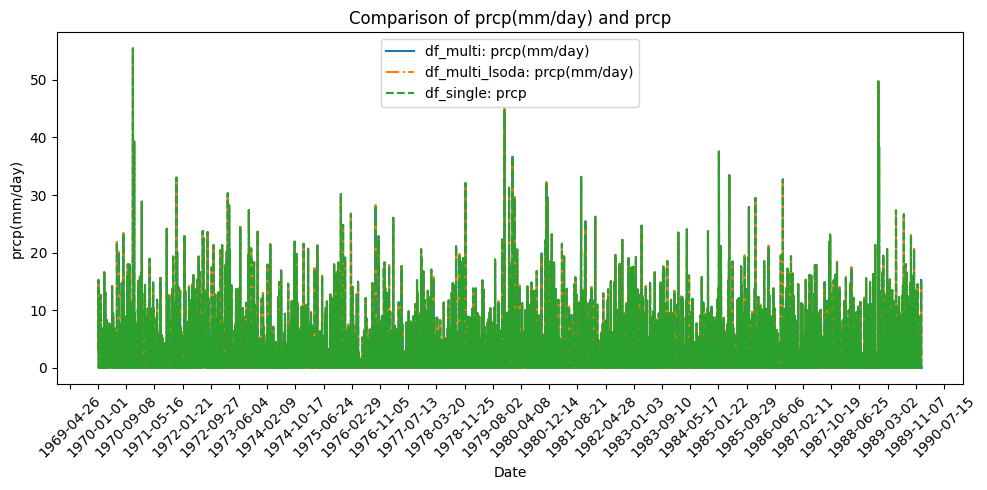

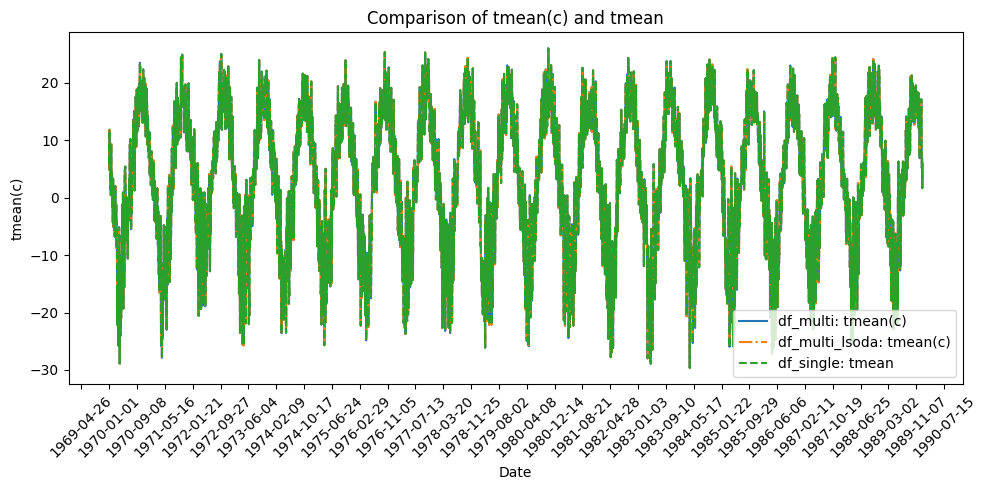

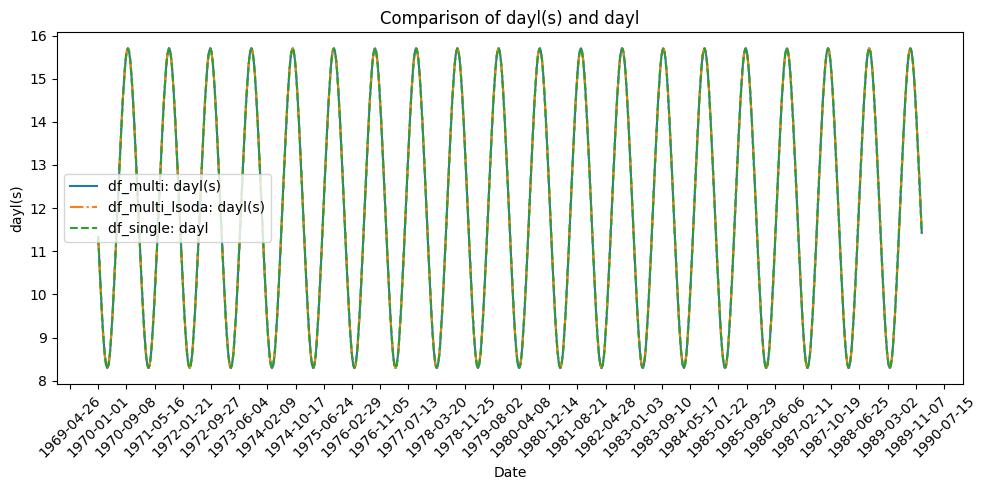

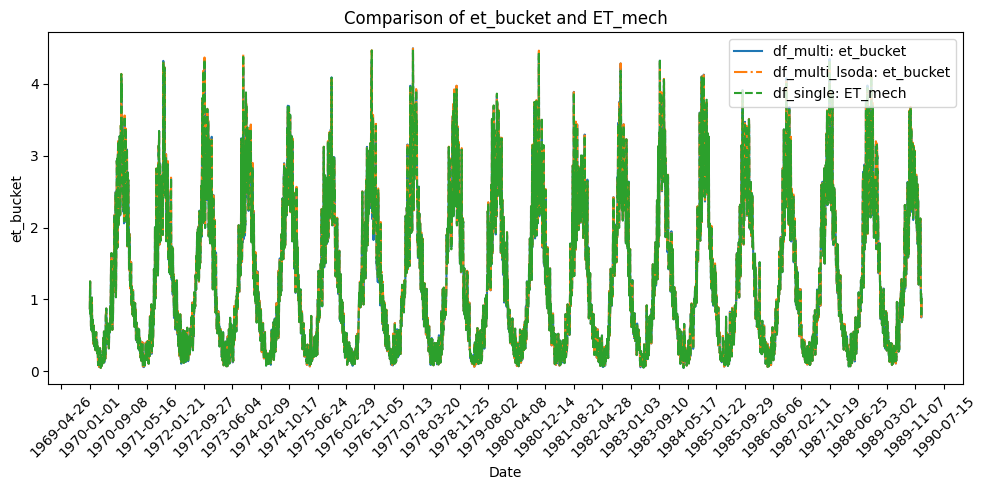

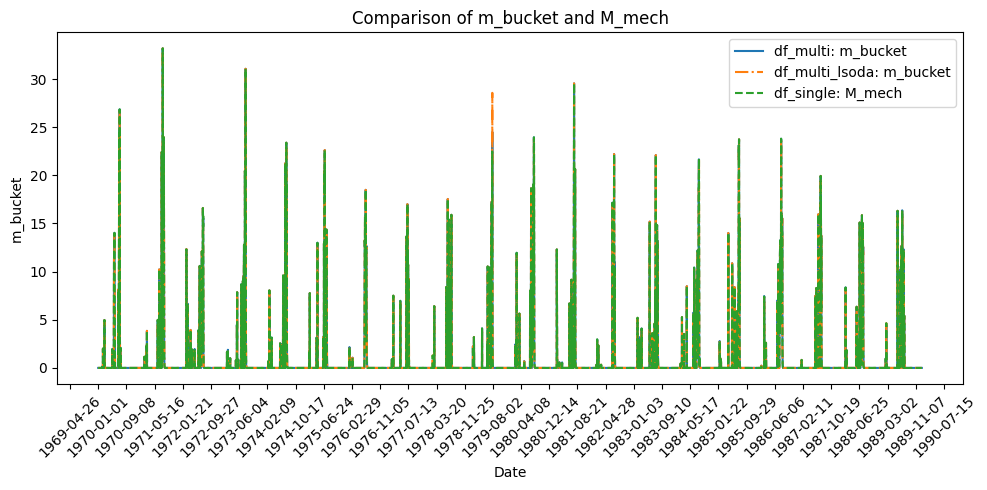

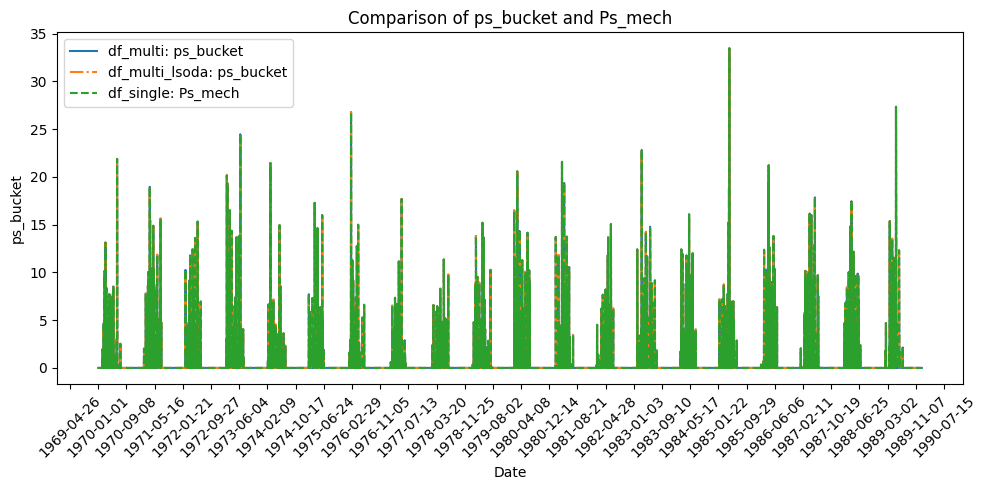

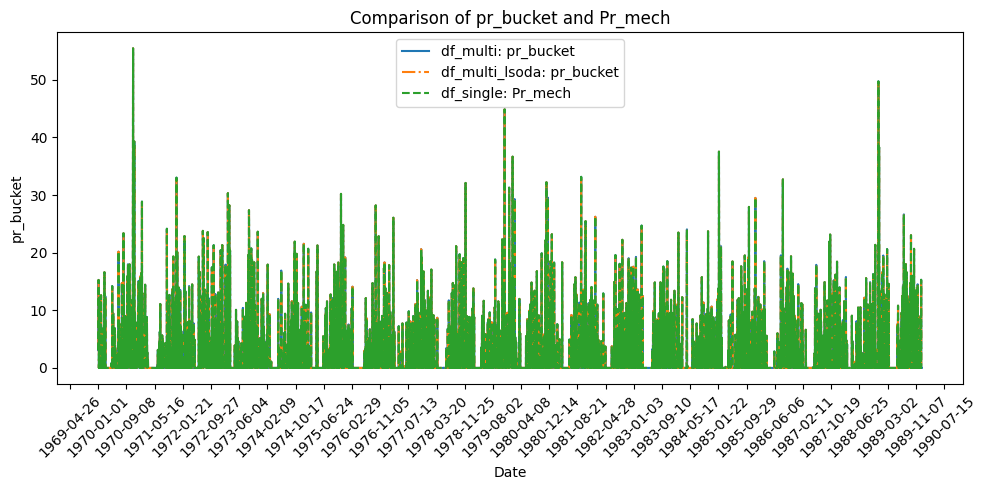

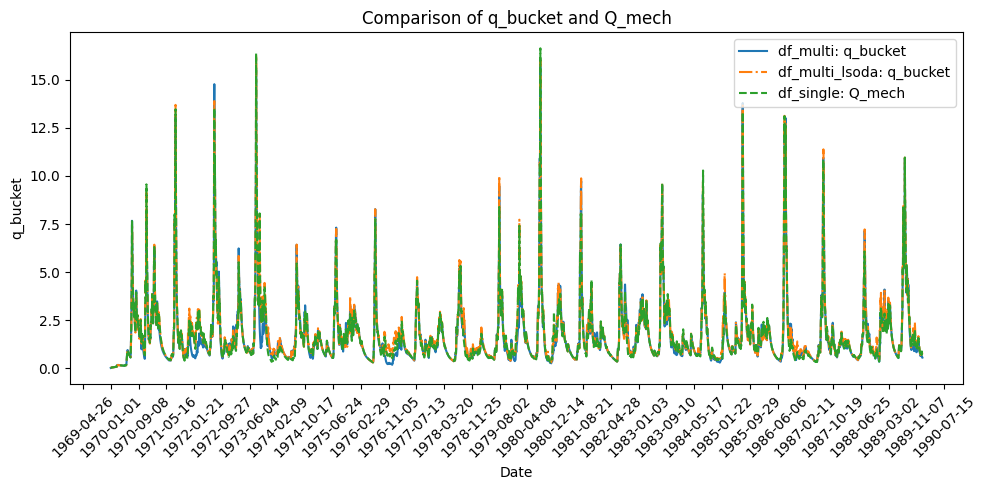

In [13]:
# Downsampling data for plotting
downsample_factor = 1  # Plot every 10th data point
df_multi_downsampled = df_multi.iloc[::downsample_factor, :]
df_multi_lsoda_downsampled = df_multi_lsoda.iloc[::downsample_factor, :]
df_single_downsampled = df_single.iloc[::downsample_factor, :]

# Plot each pair of variables with downsampling
for multi_var, single_var in variable_pairs.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df_multi_downsampled.date, df_multi_downsampled[multi_var], label=f'df_multi: {multi_var}', linestyle='-')
    plt.plot(df_multi_lsoda_downsampled.date, df_multi_lsoda_downsampled[multi_var], label=f'df_multi_lsoda: {multi_var}', linestyle='-.')
    plt.plot(df_single_downsampled.date, df_single_downsampled[single_var], label=f'df_single: {single_var}', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(multi_var)
    plt.title(f'Comparison of {multi_var} and {single_var}')
    plt.legend()

    # Format x-axis dates
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(40))
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()